<h1>Visualize Time Series Data</h1>

<h3>Load data</h3>

In [2]:
import pandas as pd

# Load data
file_path = './facial_expressions_with_grade_groups_with_eye_tracking_march_2024.csv'
facial_expression_data = df = pd.read_csv(file_path, low_memory=False)

facial_expression_data.head()

,Unnamed: 0,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,...,Fixation Dispersion,Saccade Duration,Saccade Amplitude,Saccade Peak Velocity,Saccade Peak Acceleration,Saccade Peak Deceleration,Saccade Direction,Respondent,Grade,Grade Group
0,1,36109.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
1,2,36236.000,0.125566,0.186393,0.023706,0.125796,0.025453,0.125512,0.055428,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
2,3,36269.000,0.125833,0.186909,0.023738,0.126169,0.025312,0.125694,0.055510,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55
3,4,36270.473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,887.4785,49.147195,385.177405,9959.550382,-7885.240429,187.258369,1,100,Above 55
4,5,36301.000,0.126258,0.187818,0.023798,0.126605,0.025114,0.125970,0.055607,0.328766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,100,Above 55


In [3]:
from dtaidistance import dtw
import numpy as np
import pandas as pd

# Assuming 'df' is your DataFrame
selected_columns = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement']

def compute_dtw_distance_matrices(df, features, respondent_column='Respondent'):
    dtw_matrices = {}
    for feature in features:
        time_series_data = {}
        for respondent, group_df in df.groupby(respondent_column):
            # Ensure only non-NaN values are considered for each series
            time_series_data[respondent] = group_df[feature].dropna().to_numpy(dtype=np.double)
        
        # Prepare the list of time series for DTW computation
        series_list = list(time_series_data.values())
        
        # Check if there's enough series to compute DTW
        if len(series_list) > 1:
            # Compute the DTW distance matrix using the 'dtaidistance' library
            dist_matrix = dtw.distance_matrix_fast(series_list)
            # Handle infinite distances
            np.fill_diagonal(dist_matrix, 0)  # Setting diagonal to 0
            dist_matrix[dist_matrix == np.inf] = np.amax(dist_matrix[np.isfinite(dist_matrix)])
            
            dtw_matrices[feature] = dist_matrix
        else:
            print(f"Not enough data to compute DTW for {feature}.")
    
    return dtw_matrices

# Compute DTW distance matrices for all selected features
dtw_distance_matrices = compute_dtw_distance_matrices(facial_expression_data, selected_columns)


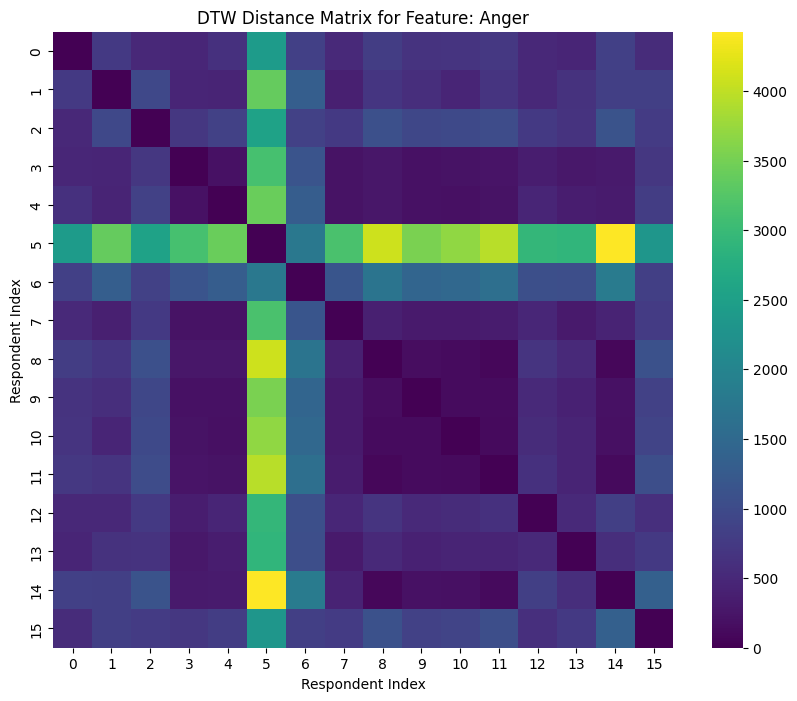

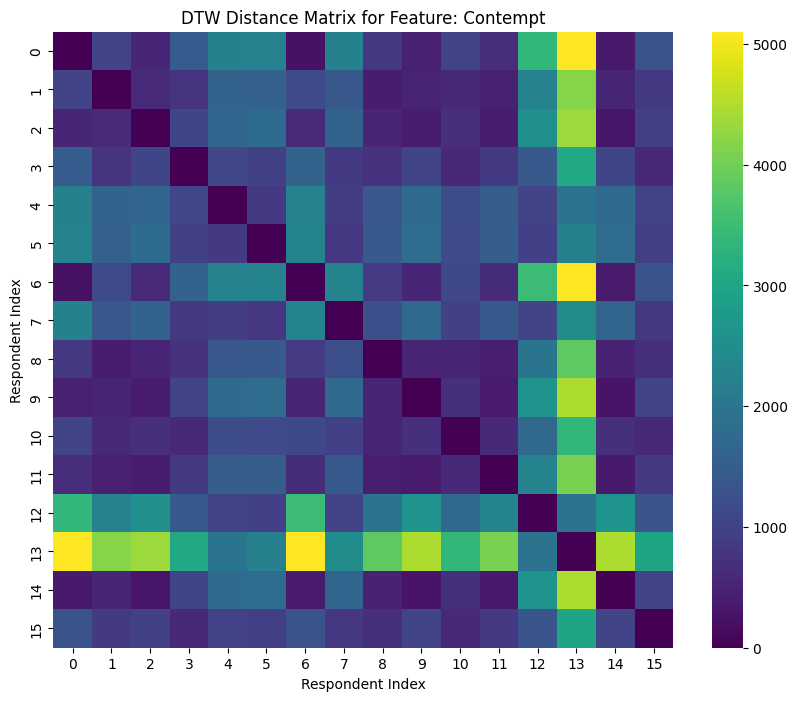

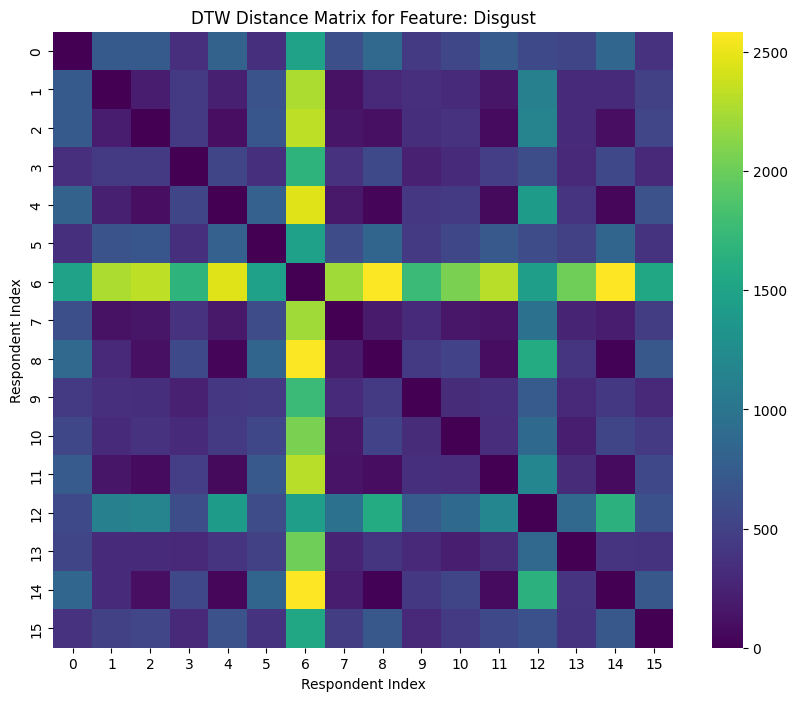

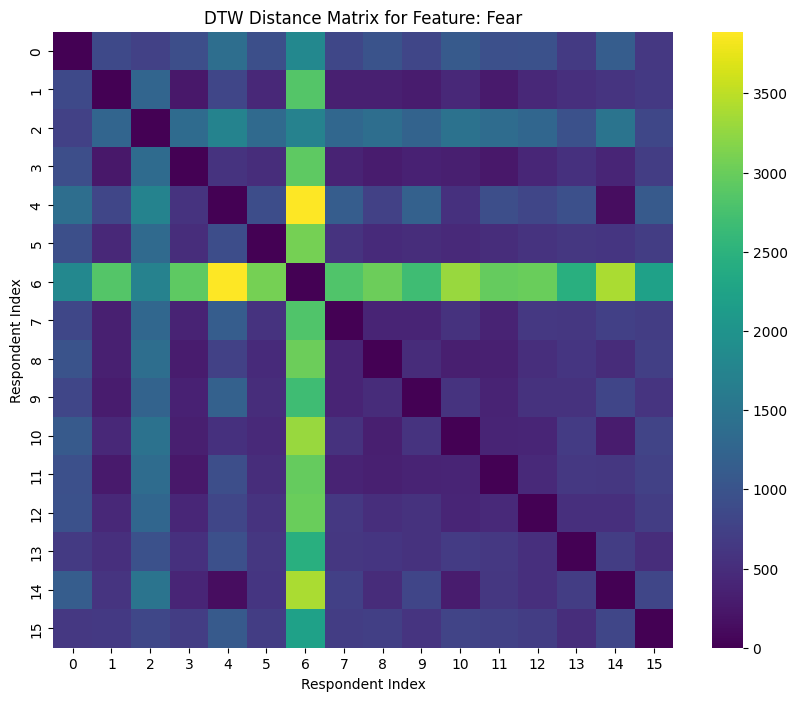

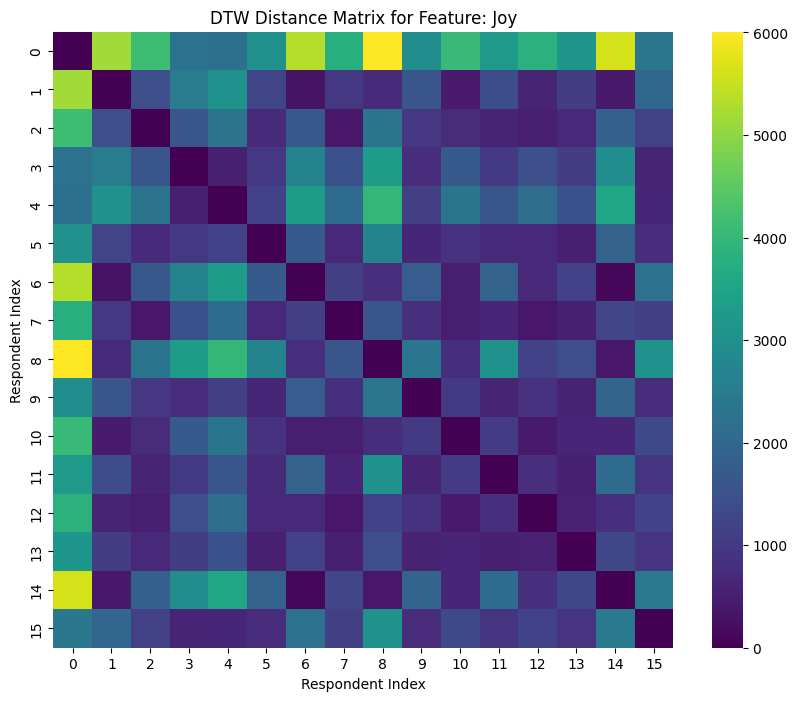

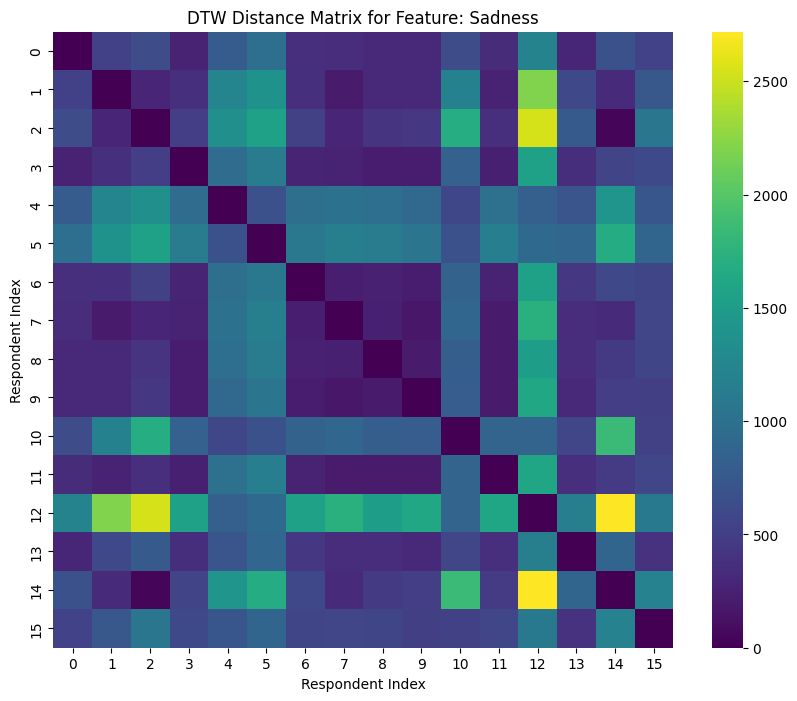

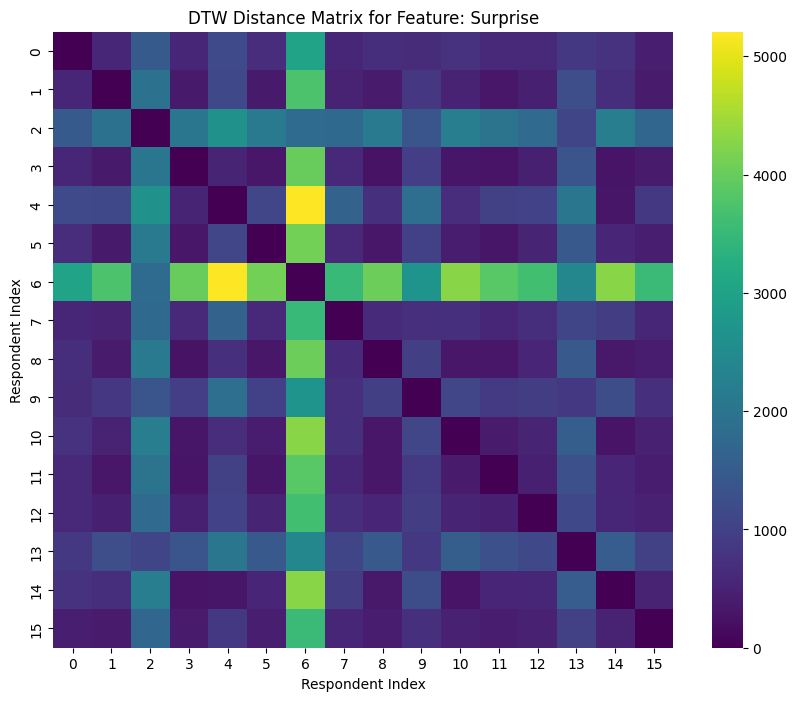

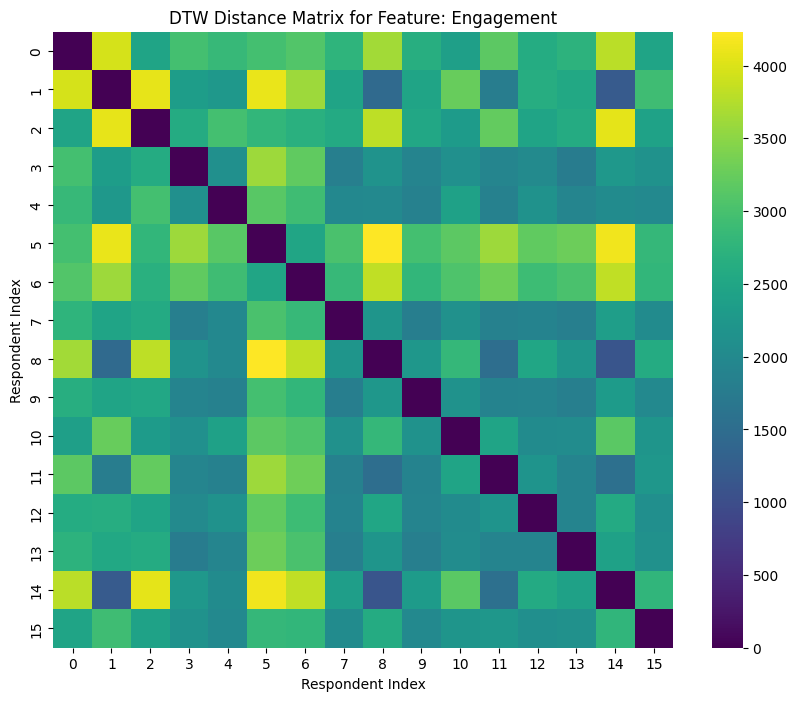

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dtw_distance_matrices(dtw_matrices):
    for feature, dist_matrix in dtw_matrices.items():
        plt.figure(figsize=(10, 8))
        sns.heatmap(dist_matrix, cmap='viridis')
        plt.title(f'DTW Distance Matrix for Feature: {feature}')
        plt.xlabel('Respondent Index')
        plt.ylabel('Respondent Index')
        plt.show()

# Plot the DTW distance matrices for all selected features
plot_dtw_distance_matrices(dtw_distance_matrices)
